In [1]:
from ultralytics import YOLO
import os
import tensorboard
import torch
import pandas as pd

In [2]:
ls

 Volume in drive F is superszybkissd
 Volume Serial Number is 98A2-EE81

 Directory of f:\PRACA_MAGISTERSKA\UCZENIE_MODELI\yolov10l

16.06.2025  14:58    <DIR>          .
23.06.2025  14:58    <DIR>          ..
07.03.2025  16:37    <DIR>          .ipynb_checkpoints
24.03.2025  01:45               150 data.yaml
07.03.2025  22:26    <DIR>          predictions
07.03.2025  16:38    <DIR>          runs
25.03.2025  01:18           567˙763 validation_results.csv
07.03.2025  16:39         5˙613˙764 yolo11n.pt
16.06.2025  14:58           839˙415 yolov10l.ipynb
26.02.2025  13:18        52˙425˙230 yolov10l.pt
               5 File(s)     59˙446˙322 bytes
               5 Dir(s)  81˙521˙123˙328 bytes free


In [3]:
%load_ext tensorboard
%tensorboard --logdir runs/detect

In [4]:
torch.cuda.empty_cache()
# Load a COCO-pretrained model
model = YOLO('yolov10l.pt')

# Display model information (optional)
model.info()

# Train the model (100 epochs)
results = model.train(data='data.yaml', epochs=200, imgsz=640, device=0, patience=50, batch=0.9, save_period=10, warmup_epochs=3.0, name='dataset-v2-finetune-1', freeze=10)
# Export the mode
path = model.export(format="torchscript")  # return path to exported model

YOLOv10l summary: 364 layers, 25,888,688 parameters, 0 gradients, 127.9 GFLOPs
New https://pypi.org/project/ultralytics/8.3.107 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine\trainer: task=detect, mode=train, model=yolov10l.pt, data=data.yaml, epochs=200, time=None, patience=50, batch=0.9, imgsz=640, save=True, save_period=10, cache=False, device=0, workers=8, project=None, name=dataset-v2-finetune-1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnosti

train: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\train.cache... 2036 images, 436 backgrounds, 0 corru


AutoBatch: Computing optimal batch size for imgsz=640 at 90.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 0.24G reserved, 0.23G allocated, 11.52G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    25771496       127.2         1.598         111.4           nan        (1, 3, 640, 640)                    list
    25771496       254.4         3.112         84.34           nan        (2, 3, 640, 640)                    list
    25771496       508.9         5.063         108.8           nan        (4, 3, 640, 640)                    list
    25771496        1018         9.047         125.2           nan        (8, 3, 640, 640)                    list
    25771496        2036        16.746         241.9           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 9 for CUDA:0 10.52G/12.00G (88%) 


train: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\train.cache... 2036 images, 436 backgrounds, 0 corru
val: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\val.cache... 679 images, 154 backgrounds, 0 corrupt: 1


Plotting labels to runs\detect\dataset-v2-finetune-1\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 167 weight(decay=0.0), 180 weight(decay=0.0004921875), 179 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to runs\detect\dataset-v2-finetune-1
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      4.09G      3.321       3.49      2.842         13        640: 100%|██████████| 227/227 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.787       0.82      0.864      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      3.97G      3.132      1.982      2.682          9        640: 100%|██████████| 227/227 [01:11<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388       0.88      0.841       0.91      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      4.03G      3.092      1.846      2.648         12        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.866       0.86      0.917      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      3.99G       3.01      1.731      2.593         24        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388       0.85      0.855      0.916      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      3.93G      2.951      1.672      2.577          6        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.874       0.86      0.922      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      3.98G      2.926      1.627      2.568         20        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.881      0.888      0.936      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      3.96G      2.834      1.522      2.512         22        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.904      0.875      0.941      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      4.02G      2.827       1.54       2.48         10        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.899      0.883      0.941      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      3.99G       2.79      1.488      2.488         17        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.916       0.89       0.95      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      3.98G      2.758      1.472      2.458         17        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.899      0.874       0.94      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      4.01G      2.725      1.428      2.441         33        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.916      0.876      0.947      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200       3.9G      2.715      1.385      2.427         15        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.929      0.894      0.955      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      4.04G      2.664      1.374      2.403         18        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.917      0.885      0.948      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      3.88G      2.652      1.338      2.414          6        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.906      0.889       0.95      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      3.97G       2.64      1.362      2.391         29        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.914      0.877      0.946      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      3.97G      2.608      1.315      2.384         31        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.928      0.884      0.954      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200       3.9G      2.588      1.288      2.364         15        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.927      0.882      0.952      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200         4G      2.612      1.296      2.363          3        640: 100%|██████████| 227/227 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10

                   all        679       3388      0.929      0.895      0.957      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      3.95G      2.576      1.289      2.364         21        640: 100%|██████████| 227/227 [01:07<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.932      0.885      0.953      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      3.99G      2.549      1.278      2.345         11        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.911      0.909      0.958      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      3.86G      2.542      1.267      2.347         35        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.927      0.909      0.959      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      3.88G       2.52      1.229      2.318         25        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.929      0.891      0.956      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      3.89G      2.511      1.235      2.331         17        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.919       0.91      0.959      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      4.01G      2.487      1.218      2.309         18        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.923      0.909      0.959      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      3.96G      2.446      1.176      2.303         11        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388       0.93      0.908      0.961       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      3.99G      2.485      1.192      2.304         13        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.925      0.907      0.959      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      3.98G      2.451      1.173      2.287         14        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.923      0.912       0.96      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      3.99G      2.452      1.197      2.297         29        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.931      0.911      0.962      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      3.99G      2.436      1.166      2.278         18        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.939      0.907      0.963      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      3.99G      2.421      1.151      2.274         12        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.932      0.908      0.964      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      3.96G      2.413      1.142      2.273         23        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.935      0.907      0.964      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      3.95G      2.418      1.165      2.266         15        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.932       0.92      0.966      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      3.88G      2.384      1.129      2.267         11        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.928      0.916      0.966       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      4.04G       2.36      1.111      2.246         29        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.937      0.919      0.967       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      4.02G       2.39      1.123      2.248         24        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.936      0.908      0.964       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      4.02G       2.37      1.128      2.236         17        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.944      0.903      0.964      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      3.99G      2.334      1.095      2.218         17        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.948      0.906      0.965      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      4.03G      2.344      1.104      2.236         12        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.937      0.918      0.967       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      3.97G      2.328      1.083      2.224         13        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.931      0.907      0.965      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      3.96G       2.34      1.083      2.222          7        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.932      0.911      0.963      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      4.04G      2.317      1.065      2.199          9        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.937      0.912      0.964       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      3.98G      2.296      1.081      2.199         31        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388       0.94      0.922       0.97      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      3.96G      2.279      1.048      2.201         14        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.937      0.921      0.968      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      3.98G      2.273      1.059      2.205         15        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.939      0.914      0.967      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      4.05G      2.281      1.055      2.184         18        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.936      0.915      0.965      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      3.99G      2.258      1.044      2.199         24        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.942      0.908      0.966      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      3.95G      2.264      1.037      2.187         48        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.943      0.908      0.966      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      4.05G       2.24      1.038      2.163         22        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.935      0.914      0.966      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      3.92G      2.257      1.047      2.173         18        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.928      0.925      0.967      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      3.97G      2.232       1.03      2.183         38        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.948      0.908      0.968      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      4.01G       2.23      1.016      2.149         12        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.934       0.92      0.968      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      4.05G       2.19     0.9841      2.165         28        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.944       0.92      0.968      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      3.85G      2.188     0.9987      2.162         30        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.927      0.922      0.965       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      3.91G      2.185     0.9839      2.145         22        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.939      0.922       0.97       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      4.04G      2.171          1      2.139          5        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.928       0.93      0.967      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200         4G      2.153      0.983      2.134         28        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.936      0.919      0.967      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      3.99G       2.14     0.9597      2.114         20        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.939      0.925      0.968      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      3.99G      2.159     0.9873      2.134         46        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.939      0.913      0.965      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      3.88G      2.129     0.9657      2.147         12        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.942      0.915      0.969      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      4.02G      2.169     0.9835      2.142         11        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.939       0.92      0.967      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      3.94G      2.129     0.9631      2.116          8        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.933      0.923      0.968      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      4.03G      2.132     0.9689      2.115         47        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.938      0.917      0.966      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      4.01G      2.102     0.9445      2.119         10        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.935      0.929      0.967      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      3.96G      2.113      0.959       2.11         21        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.945      0.915      0.966      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      3.98G       2.11     0.9596      2.112          6        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.943      0.928       0.97      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      3.96G      2.092     0.9429        2.1         12        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.938      0.921      0.968      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      3.97G      2.082     0.9437      2.105         28        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.938      0.924      0.968      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      3.94G      2.075      0.929      2.092         16        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.942      0.925      0.969      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      3.99G      2.061     0.9212      2.096          7        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.943      0.918      0.967      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      4.06G      2.057     0.9172        2.1         37        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.936      0.922      0.968      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      3.97G      2.042     0.9124      2.078         14        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388       0.94      0.926       0.97       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200         4G      2.047     0.9022      2.074         13        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.947       0.92      0.968      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      3.88G      2.045     0.9195      2.088         13        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.942      0.924      0.969       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      3.87G      2.059     0.9178      2.088         23        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.929      0.926      0.967      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      3.94G      2.043     0.9118      2.078         11        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.942      0.926       0.97      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      4.03G      2.031     0.9014      2.073         13        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.938      0.932      0.972      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      3.99G      2.017     0.8928      2.055         20        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.945      0.921      0.969      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      4.04G      2.011     0.8943      2.053         24        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.941      0.927      0.969      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      4.01G      1.998     0.8871      2.051         12        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388       0.94      0.928      0.969       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      4.02G      1.987     0.8928      2.061         24        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.943      0.929       0.97       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      3.98G      1.967     0.8726      2.054         24        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.947      0.926      0.969      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      3.97G      1.977     0.8739      2.052         20        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388       0.94      0.925      0.967       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      3.99G      1.985     0.8821      2.041         19        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.946      0.915      0.968      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      3.93G       1.95     0.8611      2.039         12        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.948      0.924      0.969      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      3.91G      1.979     0.8819      2.035         17        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.936      0.927      0.967      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200         4G      1.975     0.8874      2.051         37        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.938      0.923      0.968      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      3.99G      1.965     0.8758      2.038         24        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.956      0.911      0.967      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      3.98G      1.934     0.8719      2.037         14        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388       0.95      0.919       0.97       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      3.96G      1.938     0.8593       2.02         12        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.957      0.916       0.97      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200         4G       1.93     0.8518      2.023         19        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.942      0.928      0.969      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      4.04G       1.94     0.8522      2.029         16        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.943      0.926      0.968       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      3.98G      1.932     0.8513      2.035          6        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.947      0.924      0.968      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      3.92G      1.921     0.8551      2.016         11        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.939      0.926      0.969      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      3.97G      1.895     0.8362      2.021         36        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.945      0.925      0.969      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      4.03G      1.885     0.8322      2.019         38        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.945      0.926       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      3.98G        1.9     0.8462      2.011         15        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.937      0.932      0.969      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      3.98G      1.885     0.8319      2.008          9        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.945      0.924      0.968      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      3.98G      1.894     0.8388      2.008         30        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.944      0.924      0.968      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      3.97G      1.872     0.8271      1.999         21        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.938      0.932       0.97      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      3.98G      1.897     0.8383      2.015          8        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.948      0.922      0.968      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      3.88G      1.877     0.8343      2.008         17        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.949       0.92       0.97       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      3.93G      1.873     0.8148      1.991         24        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.945      0.924       0.97      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      3.87G      1.863     0.8276      2.003         18        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.949      0.921       0.97      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      3.98G      1.852     0.8076      1.976         22        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.949      0.929      0.971      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      3.98G      1.827     0.8056      1.985         21        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.945      0.924       0.97      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      3.97G      1.838     0.8135      1.981         17        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.947      0.921      0.969      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      4.03G      1.839     0.8086      1.988         11        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.948      0.923       0.97      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200       3.9G      1.849     0.8237      1.981          1        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388       0.94      0.926      0.968      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      3.94G      1.845     0.8167      1.993         17        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.949      0.917      0.968      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      3.84G      1.828     0.7934      1.968         30        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.946      0.928       0.97      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      4.05G      1.823     0.7977      1.976          6        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.947      0.923      0.969      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      3.97G      1.809     0.7955      1.972          9        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.941       0.93      0.969      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      4.03G      1.829     0.8034      1.981         13        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.942      0.921      0.968      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      3.99G      1.808     0.7965      1.981         10        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388       0.94      0.925      0.969      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      4.04G      1.807     0.7835      1.962         41        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.946      0.923      0.968      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      4.04G      1.801     0.7901      1.966         29        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.945      0.926      0.969      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      3.97G      1.776     0.7762      1.956         14        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.952      0.921      0.968      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      4.04G      1.797     0.7963      1.964         29        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.942      0.927      0.969       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      3.96G      1.802     0.7917      1.965         22        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.948      0.919      0.968      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      3.96G      1.782      0.799      1.971          7        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.949      0.918      0.968      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      3.92G      1.778     0.7846      1.947          8        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.949      0.923      0.968      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      3.91G      1.757     0.7614      1.961         25        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388       0.94      0.929       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      3.97G       1.75     0.7585      1.954         22        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.946       0.92       0.97      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      3.86G      1.749     0.7615      1.942         24        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.939      0.932      0.971      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200         4G      1.756     0.7688      1.946         18        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.948       0.92      0.969      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      3.99G      1.757     0.7692      1.958         24        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.944      0.923      0.969      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      3.96G       1.76     0.7716      1.946          5        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.941      0.929      0.969      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      3.98G       1.75     0.7658      1.942         13        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.944      0.923      0.968      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      3.94G      1.738     0.7705      1.959         20        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388       0.95      0.918      0.968      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      3.99G      1.738     0.7586      1.935         20        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.937       0.93      0.969      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      3.96G      1.719     0.7454      1.933          6        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.938      0.932       0.97      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      3.98G      1.705     0.7462      1.933         14        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.947      0.916      0.971      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      3.98G      1.706     0.7357      1.932         26        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.953      0.919       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      3.97G      1.697     0.7348      1.929         13        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.945      0.921      0.969      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      4.03G      1.691     0.7366      1.925         13        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.953      0.915       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      3.92G      1.682     0.7377      1.927         15        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.941      0.932       0.97      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      4.01G      1.704     0.7466      1.927         13        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.946      0.926       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      3.96G      1.678      0.726       1.93         12        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.939      0.926      0.969      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200       3.9G      1.688     0.7397      1.919         48        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.944      0.928       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      3.99G      1.696     0.7402      1.936         16        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.951      0.918      0.968      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      3.96G      1.686     0.7395      1.916         16        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.955      0.914      0.969      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      4.04G      1.667     0.7336      1.928         25        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.946      0.928       0.97      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      4.01G      1.676     0.7326      1.918         15        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.948      0.921       0.97      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      3.92G      1.653     0.7095      1.918          7        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.944      0.924      0.969      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200       3.9G      1.652     0.7183      1.904          8        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.937      0.929      0.969      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      3.99G      1.673     0.7229        1.9         12        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.952      0.918       0.97      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      3.87G      1.668     0.7266      1.899         31        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.947      0.917      0.969      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      3.99G       1.65     0.7204      1.909          8        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388       0.95      0.919       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      4.02G      1.643      0.705      1.905         11        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.942      0.929      0.969      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      3.97G      1.627     0.7019      1.887         36        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388       0.94      0.928       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      3.96G      1.646      0.718      1.908         14        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.944      0.926       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      3.95G      1.635     0.7115      1.902          8        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388       0.94      0.929      0.969      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      3.98G      1.638     0.7107      1.896         17        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.946      0.926      0.969      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      3.99G      1.631     0.7131      1.908          9        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.944      0.934      0.971      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      3.97G      1.636     0.7166      1.897         16        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.947      0.928       0.97      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      3.98G      1.619     0.7052      1.892         23        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.943      0.931      0.971      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      3.95G      1.622     0.6989      1.895         28        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.951      0.921       0.97      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      3.97G      1.616     0.7079      1.892         16        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.946      0.925      0.971      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      3.94G      1.602     0.6859      1.894         27        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.941      0.929       0.97      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      4.05G      1.608     0.6941      1.892         29        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.942      0.928      0.969      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200         4G      1.622     0.7056      1.897         16        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.945      0.923      0.969      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      4.01G      1.605     0.7071      1.887         13        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.948       0.92      0.969      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      3.99G      1.612     0.7078      1.885          3        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.943      0.924      0.968      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      3.97G      1.594     0.6946       1.89         12        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.949      0.923      0.969      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      3.97G      1.603     0.7007      1.889         15        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.951      0.918      0.969      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      3.99G      1.589     0.6825      1.875         16        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.945      0.925      0.969      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      3.95G       1.57     0.6849      1.886         24        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.949      0.922       0.97      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      3.98G      1.578     0.6744      1.879         15        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.954      0.918       0.97      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      3.97G      1.572     0.6801      1.872         19        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.952       0.92      0.971      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      3.98G      1.552     0.6666      1.865         30        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.946      0.928       0.97      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200         4G      1.573     0.6814      1.868         12        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.952      0.917      0.971      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200       3.9G      1.562     0.6772      1.866         31        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.949       0.92       0.97      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      3.96G      1.569      0.685      1.884         50        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.945      0.922      0.969      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      3.93G      1.557     0.6879      1.872         17        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.946      0.926      0.969      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      3.87G      1.536     0.6623      1.858         27        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.949      0.918      0.969      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      3.96G      1.563     0.6656      1.867          5        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.948      0.921       0.97      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      3.97G      1.557     0.6725      1.861         13        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.937      0.932      0.969      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      3.98G      1.541     0.6669      1.875          9        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.932      0.939       0.97      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      3.99G      1.553     0.6843      1.848         46        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.947      0.921      0.969      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      3.96G      1.518     0.6592      1.865         14        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.947      0.927       0.97      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      3.99G      1.536     0.6695      1.857         35        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.947      0.927       0.97      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      3.97G      1.533     0.6694      1.873         34        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.948      0.923       0.97      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      4.02G      1.527     0.6632      1.866         40        640: 100%|██████████| 227/227 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.943      0.926      0.969      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      4.01G      1.521     0.6544      1.858          9        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.948      0.923      0.969      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      3.97G      1.518     0.6556      1.864         38        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388       0.95      0.924       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      3.97G      1.533     0.6671      1.858          6        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.944      0.925      0.969      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      3.96G      1.522     0.6566      1.853          7        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.954      0.914      0.969      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      4.04G      1.524     0.6539      1.867         22        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.955      0.917      0.969      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      3.93G      1.504     0.6469       1.86         18        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.944      0.921      0.969      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      3.95G      1.512     0.6544       1.86          7        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.948      0.919      0.969      0.645


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      3.93G      1.407     0.5386      1.824          7        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388       0.95       0.92      0.969      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      3.97G      1.397      0.544      1.821         10        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.946      0.923       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      3.97G      1.384     0.5291      1.816          9        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.946      0.929       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      3.93G      1.386     0.5338      1.807          3        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.945      0.929       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200         4G      1.393      0.539      1.825          3        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.945      0.926       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200         4G      1.393     0.5352      1.816          8        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.948      0.923       0.97      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      3.97G      1.406     0.5414      1.825          5        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.947      0.924       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      3.96G      1.391     0.5307      1.819          6        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.946      0.924       0.97      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      3.94G      1.381      0.527      1.808          4        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.943      0.929      0.969      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200       3.9G      1.387     0.5371      1.803          8        640: 100%|██████████| 227/227 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09

                   all        679       3388      0.942      0.928      0.969      0.646



200 epochs completed in 4.312 hours.
Optimizer stripped from runs\detect\dataset-v2-finetune-1\weights\last.pt, 52.2MB
Optimizer stripped from runs\detect\dataset-v2-finetune-1\weights\best.pt, 52.2MB

Validating runs\detect\dataset-v2-finetune-1\weights\best.pt...
Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv10l summary (fused): 197 layers, 25,722,536 parameters, 0 gradients, 126.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09


                   all        679       3388      0.955      0.915      0.971      0.647
            no_glasses        407        605      0.951      0.884      0.965      0.578
             no_gloves        472       1207      0.947       0.88      0.951      0.624
             no_helmet        449        760      0.949      0.953      0.985      0.645
               no_vest        481        816      0.971      0.945      0.984      0.741
Speed: 0.2ms preprocess, 8.9ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\dataset-v2-finetune-1
Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CPU (Intel Core(TM) i5-8400 2.80GHz)
YOLOv10l summary (fused): 197 layers, 25,722,536 parameters, 0 gradients, 126.3 GFLOPs

PyTorch: starting from 'runs\detect\dataset-v2-finetune-1\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (49.8 MB)

TorchScript: starting export with torch 2.5.1...
TorchScript: export success  5.9s, saved as 

In [4]:
torch.cuda.empty_cache()

Ewaluacja modelu

In [3]:
# Load a model
model = YOLO('runs/detect/dataset-v2-1/weights/epoch100.pt')

# Validate a model
metrics = model.val(iou=0.6)   # no arguments needed, dataset and settings remembered
metrics.box.map         # map50-95
metrics.box.map50       # map50
metrics.box.map75       # map75
metrics.box.maps        # a list contains map50-95 of each category

Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv10l summary (fused): 197 layers, 25,722,536 parameters, 0 gradients, 126.3 GFLOPs


val: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\val.cache... 679 images, 154 backgrounds, 0 corrupt: 1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:15


                   all        679       3388      0.942      0.916      0.961      0.634
            no_glasses        407        605       0.95      0.919      0.968      0.588
             no_gloves        472       1207      0.916      0.872      0.928        0.6
             no_helmet        449        760      0.958      0.936      0.973      0.635
               no_vest        481        816      0.942      0.939      0.973      0.713
Speed: 0.2ms preprocess, 16.5ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\val8


array([    0.58815,     0.59956,     0.63518,     0.71327])

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
np.mean(metrics.box.f1)

np.float64(0.9288466131868316)

In [8]:
metrics.box.f1

array([    0.93441,     0.89378,     0.94651,     0.94069])

In [9]:
metrics.speed['inference']

15.91080235641735

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

def plot_confusion_matrix(matrix, normalize=True, names=()):
    """
    Plot the confusion matrix using seaborn.
    należy dwukrotnie wywołać funkcję aby zwiększył się rozmiar opisów

    Args:
        matrix (np.ndarray): Macierz pomyłek (np. metrics.confusion_matrix.matrix)
        normalize (bool, optional): Czy normalizować macierz. Default: True
        names (tuple, optional): Nazwy klas, używane jako etykiety na wykresie.
    """
    array = matrix / ((matrix.sum(0).reshape(1, -1) + 1e-9) if normalize else 1)  # normalizacja kolumn
    array[array < 0.005] = np.nan  # nie pokazuj wartości poniżej 0.005 (będzie pusty)

    fig, ax = plt.subplots(1, 1, figsize=(12, 9), tight_layout=True)
    nc = metrics.confusion_matrix.nc
    nn = len(names)  # liczba nazw
    sn.set(font_scale=1.5 if nc < 50 else 0.8)  # rozmiar czcionki
    labels = (0 < nn < 99) and (nn == nc)  # czy zastosować nazwy jako etykiety
    ticklabels = (list(names.values()) + ["background"]) if labels else "auto"
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")  # ignoruj ostrzeżenia o pustej macierzy
        sn.heatmap(
            array,
            ax=ax,
            annot=nc < 30,
            annot_kws={"size": 18},
            cmap="Blues",
            fmt=".2f" if normalize else ".0f",
            square=True,
            vmin=0.0,
            xticklabels=ticklabels,
            yticklabels=ticklabels,
        ).set_facecolor((1, 1, 1))
    title = "Confusion Matrix" + (" Normalized" if normalize else "")
    ax.set_xlabel("True")
    ax.set_ylabel("Predicted")
    ax.set_title(title)
    plt.show()

In [6]:
def plot_mc_curve(px, py, names=(), xlabel="Confidence", ylabel="Metric"):
    """Plots a metric-confidence curve."""
    fig, ax = plt.subplots(1, 1, figsize=(9, 6), tight_layout=True)

    if 0 < len(names) < 21:  # display per-class legend if < 21 classes
        for i, y in enumerate(py):
            ax.plot(px, y, linewidth=1, label=f"{names[i]}")  # plot(confidence, metric)
    else:
        ax.plot(px, py.T, linewidth=1, color="grey")  # plot(confidence, metric)

    y = smooth(py.mean(0), 0.05)
    ax.plot(px, y, linewidth=3, color="blue", label=f"all classes, best Confidence {y.max():.2f} at {px[y.argmax()]:.3f}")
    ax.set_xlabel(xlabel, fontsize=17)
    ax.set_ylabel(ylabel, fontsize=17)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(True)
    ax.legend(fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.set_title(f"{ylabel}-Confidence Curve", fontsize=18)
    plt.show()

In [7]:
def plot_pr_curve(px, py, ap, names=()):
    """Plots a precision-recall curve."""
    fig, ax = plt.subplots(1, 1, figsize=(9, 6), tight_layout=True)
    py = np.stack(py, axis=1)  # shape (len(px), num_classes)
    ap = np.array(ap).flatten()  # zapewnia 1D

    if 0 < len(names) < 21:
        for i, y in enumerate(py.T):
            ax.plot(px, y, linewidth=1, label=f"{names[i]} {ap[i]:.3f}")
    else:
        ax.plot(px, py, linewidth=1, color="grey")

    ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap.mean():.3f} mAP@0.5")
    ax.set_xlabel("Recall", fontsize=17)
    ax.set_ylabel("Precision", fontsize=17)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.legend(loc='lower left', fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.grid(True)
    ax.set_title("Precision-Recall Curve", fontsize=18)
    plt.show()

In [8]:
def smooth(y, f=0.05):
    """Box filter of fraction f."""
    nf = round(len(y) * f * 2) // 2 + 1  # number of filter elements (must be odd)
    p = np.ones(nf // 2)  # ones padding
    yp = np.concatenate((p * y[0], y, p * y[-1]), 0)  # y padded
    return np.convolve(yp, np.ones(nf) / nf, mode="valid")  # y-smoothed

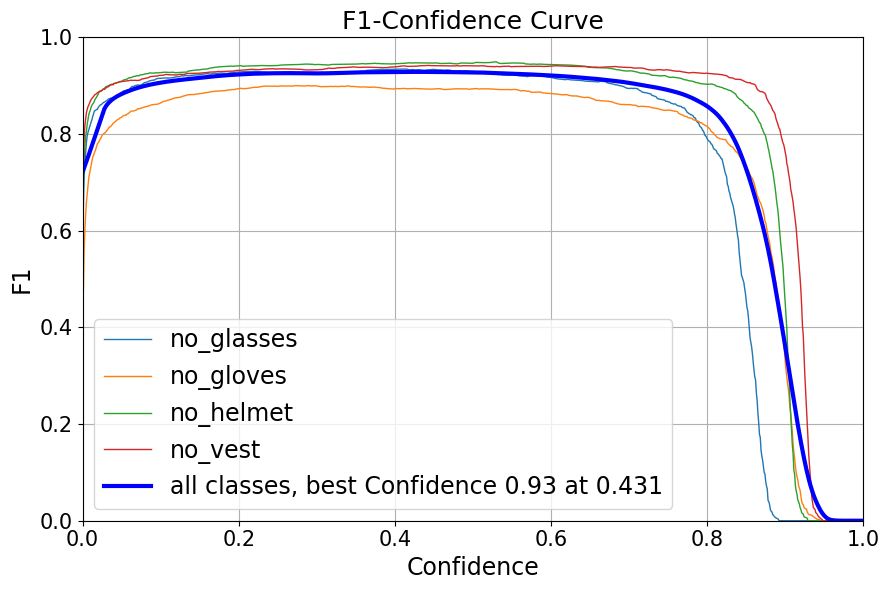

In [9]:
x, prec_values = np.linspace(0, 1, 1000), []

f1_curve = metrics.box.f1_curve
metrics.names
plot_mc_curve(x, f1_curve, metrics.names, ylabel="F1")

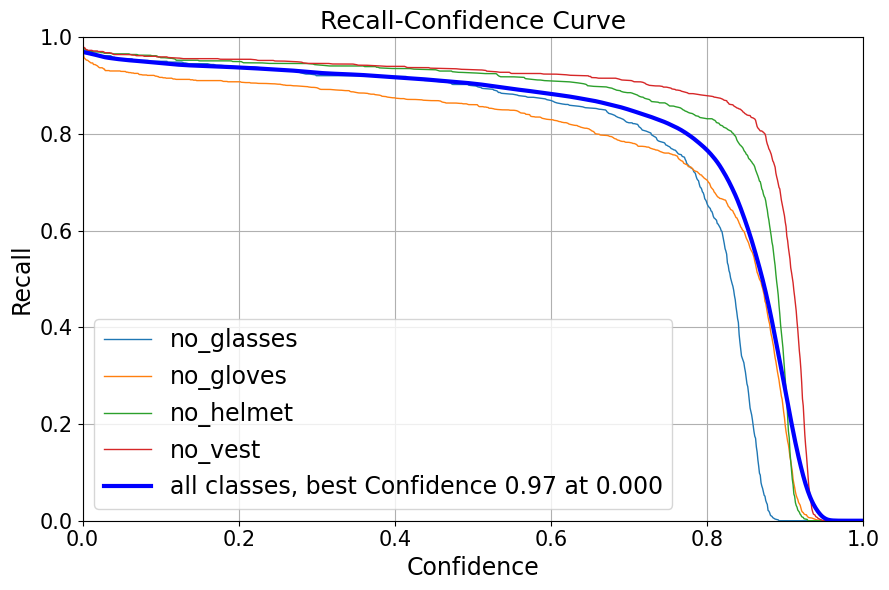

In [10]:
plot_mc_curve(x, metrics.box.r_curve, metrics.names, ylabel="Recall")

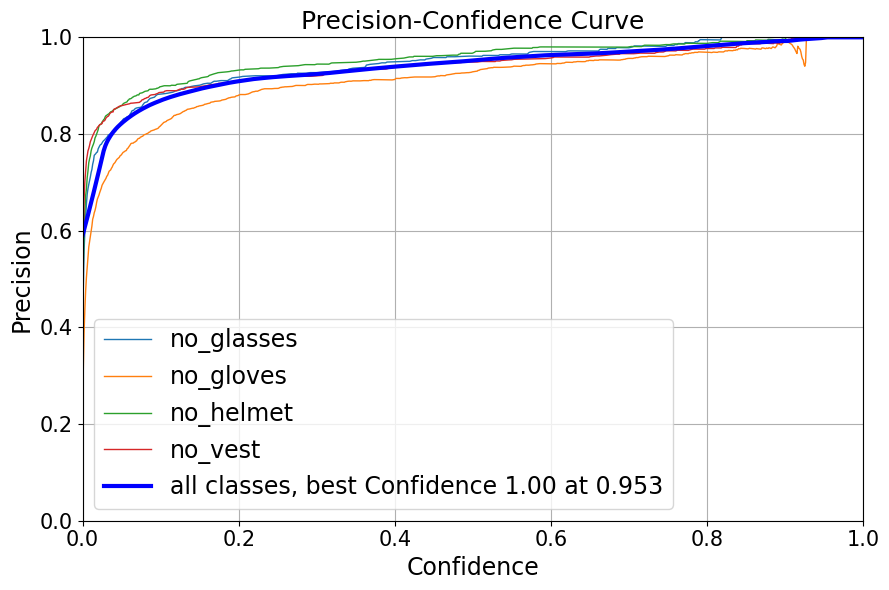

In [11]:
plot_mc_curve(x, metrics.box.p_curve, metrics.names, ylabel="Precision")

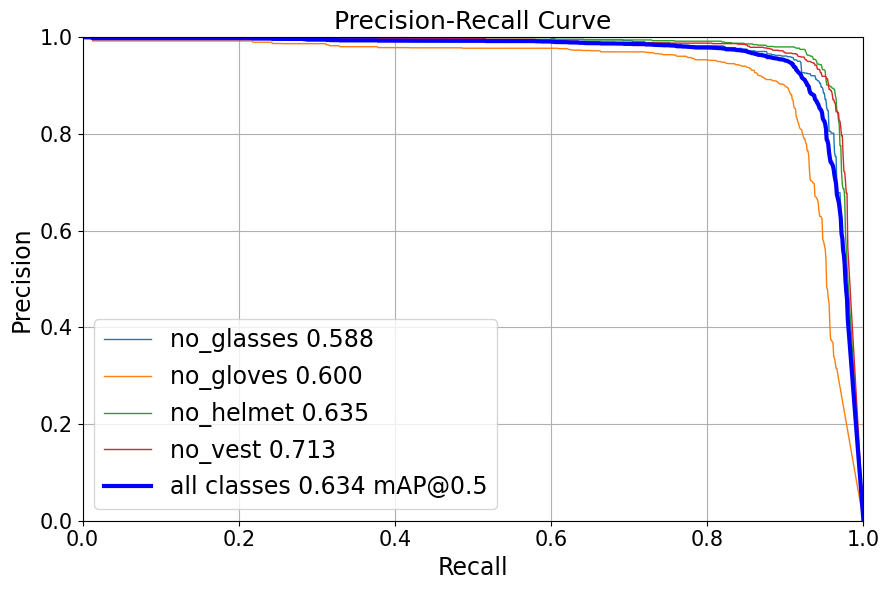

In [12]:
plot_pr_curve(x, metrics.box.prec_values, metrics.box.ap, metrics.names)

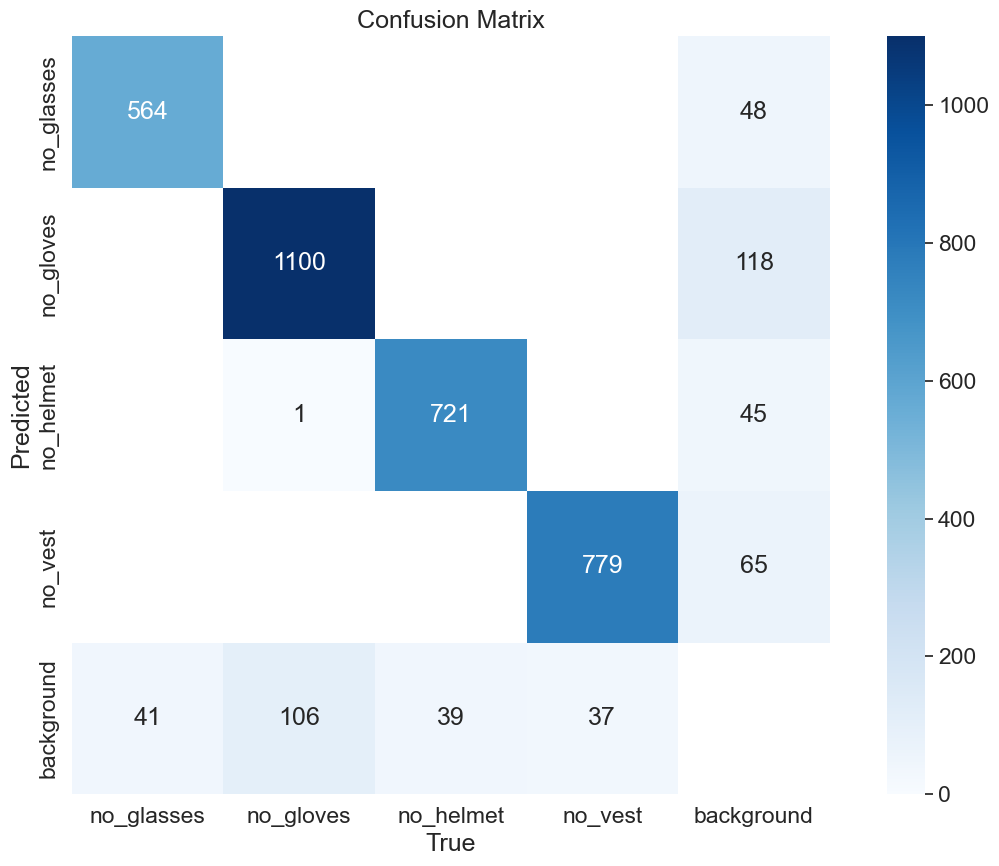

In [7]:
plot_confusion_matrix(metrics.confusion_matrix.matrix, normalize=False, names=metrics.names)

Predykcja

In [9]:
# Load a model
model = YOLO('runs/detect/dataset-v2-1/weights/epoch100.pt')

# Define path to directory containing images and videos for inference
source = '/PRACA_MAGISTERSKA/DATASETS/PREDYKCJA/images'

# Run inference on the source
results = model(source)  # generator of Results objects

predictions = 'predictions/'
if not os.path.exists(predictions):
  os.mkdir(predictions)

# Process results list
for id, result in enumerate(results, 1):
    boxes = result.boxes          # Boxes object for bounding box outputs
    masks = result.masks          # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs          # Probs object for classification outputs
    obb = result.obb              # Oriented boxes object for OBB outputs
    result.show()                 # Display to screen
    result.save(filename= predictions + 'result_' + str(id) + '.jpg')  # Save to disk


image 1/3 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\spacer-seniora1-2048x1362.jpg: 448x640 2 no_glassess, 4 no_glovess, 2 no_helmets, 2 no_vests, 106.8ms
image 2/3 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resource-team-talking-to-a-candidate-during-a-job-interview-in-the-office-2316131879.jpg: 480x640 3 no_glassess, 5 no_glovess, 5 no_helmets, 5 no_vests, 86.8ms
image 3/3 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resources-commission-interviewing-male-applicant-in-office-2409886423.jpg: 480x640 3 no_glassess, 3 no_glovess, 4 no_helmets, 4 no_vests, 26.1ms
Speed: 2.6ms preprocess, 73.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


In [3]:
model = YOLO('runs/detect/dataset-v2-1/weights/epoch100.pt')
results = model.predict(source='/PRACA_MAGISTERSKA/DATASETS/PREDYKCJA/images', show_conf=False, show_labels=False, device=0, save=True, conf=0.431)


image 1/5 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\spacer-seniora1-2048x1362.jpg: 448x640 2 no_glassess, 4 no_glovess, 2 no_helmets, 2 no_vests, 89.4ms
image 2/5 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-engineers-railway-survey-wearing-safety-uniform-under-conversation-document-and-tablet-on-hand-2468533629.jpg: 480x640 2 no_glovess, 91.6ms
image 3/5 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resource-team-talking-to-a-candidate-during-a-job-interview-in-the-office-2316131879.jpg: 480x640 3 no_glassess, 6 no_glovess, 4 no_helmets, 5 no_vests, 27.4ms
image 4/5 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resources-commission-interviewing-male-applicant-in-office-2409886423.jpg: 480x640 3 no_glassess, 3 no_glovess, 4 no_helmets, 2 no_vests, 29.6ms
image 5/5 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-latin-woman-with-curly-hair-wearing-a-hard-hat-and-reflective-vest-stands-confidently-in-a-city-2576103397.j

In [2]:
import time

In [4]:
model = YOLO('runs/detect/dataset-v2-1/weights/epoch100.pt')
start_time = time.time()
results = model.predict(source="/PRACA_MAGISTERSKA/DATASETS/PREDYKCJA/videos", show=False, device=0, save=True, show_conf=False, show_labels=False, conf=0.431, batch=64)
end_time = time.time()



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/4 (frame 1/227) f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\videos\las.webm: 352x640 1 no_glasses, 5 no_helmets, 4 no_vests, 12.2ms
video 1/4 (frame 2/227) f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\videos\las.webm: 352x640 1 no_glasses, 5 no_helmets, 5 no_vests, 12.2ms
video 1/4 (frame 3/227) f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\videos\las.webm: 352x640 1 no_glasses, 5 no_helmets, 5 no_vests, 12.2ms
video 1/4 (frame 4/227) f:\PRACA_MAGISTERSKA\DATAS

In [2]:
torch.cuda.empty_cache()

In [5]:
frame_count=1432
total_time = end_time - start_time
avg_fps = frame_count / total_time if total_time > 0 else 0

In [6]:
avg_fps

43.705152709520554